In [1]:
# Creating DataFrame for Tasmania

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import seaborn as sns


new_files = sorted(glob("ALL_DEMAND_DATA/*.csv"))

files = pd.concat((pd.read_csv(file).assign(filename = file)
        for file in new_files), ignore_index = True)

files

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,filename
0,NSW1,2000/01/01 00:30,6763.57000,15.64,TRADE,ALL_DEMAND_DATA\DATA200001_NSW1.csv
1,NSW1,2000/01/01 01:00,6386.10167,14.06,TRADE,ALL_DEMAND_DATA\DATA200001_NSW1.csv
2,NSW1,2000/01/01 01:30,5990.79500,14.30,TRADE,ALL_DEMAND_DATA\DATA200001_NSW1.csv
3,NSW1,2000/01/01 02:00,5655.97667,14.28,TRADE,ALL_DEMAND_DATA\DATA200001_NSW1.csv
4,NSW1,2000/01/01 02:30,5283.83667,14.17,TRADE,ALL_DEMAND_DATA\DATA200001_NSW1.csv
...,...,...,...,...,...,...
995461,SA1,2013/11/30 22:00:00,1208.35000,44.61,TRADE,ALL_DEMAND_DATA\DATA201311_SA1.csv
995462,SA1,2013/11/30 22:30:00,1198.23000,43.90,TRADE,ALL_DEMAND_DATA\DATA201311_SA1.csv
995463,SA1,2013/11/30 23:00:00,1173.62000,41.74,TRADE,ALL_DEMAND_DATA\DATA201311_SA1.csv
995464,SA1,2013/11/30 23:30:00,1176.99000,41.38,TRADE,ALL_DEMAND_DATA\DATA201311_SA1.csv


In [2]:
files_clear=files.drop(files[(files['TOTALDEMAND']<-6351.57)|(files['TOTALDEMAND']>14357.33)].index)
                    

In [3]:
tas_data  = files_clear['REGION'].str.contains('TAS')
cols=['REGION','SETTLEMENTDATE','TOTALDEMAND','RRP']
TAS = files_clear[tas_data][cols]


In [4]:
demand_df = TAS.reset_index() 

demand_df = demand_df.drop(columns = ["index","REGION","RRP"])

demand_df['SETTLEMENTDATE'] = pd.to_datetime(demand_df['SETTLEMENTDATE'])

demand_df

,SETTLEMENTDATE,TOTALDEMAND
0,2005-05-16 14:00:00,1277.46000
1,2005-05-16 14:30:00,1279.19667
2,2005-05-16 15:00:00,1282.52500
3,2005-05-16 15:30:00,1281.69167
4,2005-05-16 16:00:00,1287.23500
...,...,...
129280,2013-10-31 22:00:00,1080.65000
129281,2013-10-31 22:30:00,1052.54000
129282,2013-10-31 23:00:00,1026.36000
129283,2013-10-31 23:30:00,1015.70000


In [5]:
# temp_df = TAS.reset_index() 

# temp_df = temp_df.drop(columns = ["index","REGION"])

# temp_df['SETTLEMENTDATE'] = pd.to_datetime(temp_df['SETTLEMENTDATE'])

# temp_df

In [6]:
# temp_df.plot('SETTLEMENTDATE',y=['TOTALDEMAND','RRP'], figsize=(20,10))


In [7]:
temp_df = data = pd.read_csv("Temperature_modified.csv") 

temp_df['SETTLEMENTDATE'] = pd.to_datetime(temp_df['SETTLEMENTDATE'])
temp_df

,SETTLEMENTDATE,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa
0,2000-01-01 02:00:00,10.4,7.3,3.3,61.0,11.2,220.0,13.0,1019.3,1013.0
1,2000-01-01 02:30:00,10.3,7.1,2.9,60.0,9.4,240.0,11.2,1019.1,1012.8
2,2000-01-01 03:00:00,10.3,6.9,2.3,58.0,13.0,240.0,18.4,1018.9,1012.6
3,2000-01-01 03:30:00,10.3,6.9,2.3,58.0,13.0,240.0,18.4,1018.7,1012.4
4,2000-01-01 04:00:00,10.1,6.9,2.6,60.0,11.2,260.0,13.0,1018.5,1012.2
...,...,...,...,...,...,...,...,...,...,...
386357,2020-01-20 08:00:00,14.9,12.5,10.3,74.0,14.8,130.0,20.5,1011.4,1005.3
386358,2020-01-20 08:00:00,14.9,12.4,10.1,73.0,13.0,140.0,18.4,1011.5,1005.4
386359,2020-01-20 09:00:00,14.9,12.4,10.1,73.0,16.6,150.0,24.1,1011.7,1005.6
386360,2020-01-20 09:00:00,15.1,12.4,9.9,71.0,16.6,150.0,22.3,1011.6,1005.5


In [8]:
merged_data = pd.merge(temp_df, demand_df, how = "left", on = 'SETTLEMENTDATE')

merged_data

,SETTLEMENTDATE,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,TOTALDEMAND
0,2000-01-01 02:00:00,10.4,7.3,3.3,61.0,11.2,220.0,13.0,1019.3,1013.0,NaN
1,2000-01-01 02:30:00,10.3,7.1,2.9,60.0,9.4,240.0,11.2,1019.1,1012.8,NaN
2,2000-01-01 03:00:00,10.3,6.9,2.3,58.0,13.0,240.0,18.4,1018.9,1012.6,NaN
3,2000-01-01 03:30:00,10.3,6.9,2.3,58.0,13.0,240.0,18.4,1018.7,1012.4,NaN
4,2000-01-01 04:00:00,10.1,6.9,2.6,60.0,11.2,260.0,13.0,1018.5,1012.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
386357,2020-01-20 08:00:00,14.9,12.5,10.3,74.0,14.8,130.0,20.5,1011.4,1005.3,NaN
386358,2020-01-20 08:00:00,14.9,12.4,10.1,73.0,13.0,140.0,18.4,1011.5,1005.4,NaN
386359,2020-01-20 09:00:00,14.9,12.4,10.1,73.0,16.6,150.0,24.1,1011.7,1005.6,NaN
386360,2020-01-20 09:00:00,15.1,12.4,9.9,71.0,16.6,150.0,22.3,1011.6,1005.5,NaN


In [9]:
start_date = "2005-05-16 14:00:00"
end_date = "2013-11-01 00:00:00"

merged_df = merged_data.copy()

mask = (merged_df['SETTLEMENTDATE'] > start_date) & (merged_df['SETTLEMENTDATE'] <= end_date)

merged_df = merged_df.loc[mask]

merged_df=merged_df.dropna()

merged_df = merged_df.set_index('SETTLEMENTDATE')

merged_df

,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,TOTALDEMAND
SETTLEMENTDATE,,,,,,,,,,
2005-05-16 14:30:00,12.0,9.7,7.2,72.0,9.4,80.0,9.4,1027.1,1020.9,1279.19667
2005-05-16 15:00:00,11.4,9.6,7.7,78.0,9.4,90.0,11.2,1027.2,1020.9,1282.52500
2005-05-16 15:30:00,11.7,9.7,7.6,76.0,5.4,70.0,7.6,1027.2,1020.9,1281.69167
2005-05-16 16:00:00,11.1,9.6,8.0,81.0,5.4,170.0,5.4,1027.4,1021.1,1287.23500
2005-05-16 16:30:00,10.9,9.3,7.6,80.0,5.4,180.0,9.4,1027.5,1021.2,1309.48333
...,...,...,...,...,...,...,...,...,...,...
2013-10-31 22:00:00,13.0,8.7,3.4,52.0,9.4,330.0,14.8,1020.2,1014.0,1080.65000
2013-10-31 22:30:00,12.6,8.8,4.2,57.0,5.4,80.0,9.4,1019.9,1013.7,1052.54000
2013-10-31 23:00:00,12.1,8.6,4.4,59.0,3.6,270.0,9.4,1020.0,1013.8,1026.36000


In [10]:
# making graphs

In [11]:
start_date = "2010-01-01 00:00:00"
end_date = "2010-12-31 23:45:00"

temp_df = merged_data.copy()

mask = (temp_df['SETTLEMENTDATE'] > start_date) & (temp_df['SETTLEMENTDATE'] <= end_date)

temp_df = temp_df.loc[mask]

temp_df=temp_df.dropna()

# temp_df['SETTLEMENTDATE'] = pd.to_datetime(temp_df['SETTLEMENTDATE'])

# temp_df['SETTLEMENTDATE'] = temp_df['SETTLEMENTDATE'].dt.date


temp_df

,SETTLEMENTDATE,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,TOTALDEMAND
197146,2010-01-01 00:30:00,25.2,18.7,14.3,51.0,31.3,330.0,48.2,997.1,991.3,947.59
197148,2010-01-01 01:30:00,26.3,18.6,13.3,45.0,40.7,310.0,66.6,997.9,992.1,906.13
197149,2010-01-01 01:00:00,25.3,18.1,13.0,46.0,29.5,320.0,53.6,998.4,992.6,926.52
197150,2010-01-01 02:30:00,24.6,17.2,11.6,44.0,24.1,320.0,38.9,998.8,993.0,895.16
197151,2010-01-01 02:00:00,23.9,16.4,10.4,43.0,16.6,280.0,33.5,999.3,993.4,907.17
...,...,...,...,...,...,...,...,...,...,...,...
215545,2010-12-31 21:00:00,17.5,14.5,12.1,71.0,14.8,130.0,20.5,1002.7,996.7,1109.36
215546,2010-12-31 21:30:00,17.2,14.4,12.1,72.0,14.8,130.0,20.5,1002.4,996.4,1098.55
215547,2010-12-31 22:00:00,16.9,14.4,12.4,75.0,13.0,130.0,20.5,1002.5,996.5,1085.26
215548,2010-12-31 22:30:00,16.7,14.3,12.4,76.0,14.8,120.0,20.5,1002.1,996.1,1071.24


In [12]:
# model that predicts the demand of energy depending on the specific temperature

merged = merged_df

merged


,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa,TOTALDEMAND
SETTLEMENTDATE,,,,,,,,,,
2005-05-16 14:30:00,12.0,9.7,7.2,72.0,9.4,80.0,9.4,1027.1,1020.9,1279.19667
2005-05-16 15:00:00,11.4,9.6,7.7,78.0,9.4,90.0,11.2,1027.2,1020.9,1282.52500
2005-05-16 15:30:00,11.7,9.7,7.6,76.0,5.4,70.0,7.6,1027.2,1020.9,1281.69167
2005-05-16 16:00:00,11.1,9.6,8.0,81.0,5.4,170.0,5.4,1027.4,1021.1,1287.23500
2005-05-16 16:30:00,10.9,9.3,7.6,80.0,5.4,180.0,9.4,1027.5,1021.2,1309.48333
...,...,...,...,...,...,...,...,...,...,...
2013-10-31 22:00:00,13.0,8.7,3.4,52.0,9.4,330.0,14.8,1020.2,1014.0,1080.65000
2013-10-31 22:30:00,12.6,8.8,4.2,57.0,5.4,80.0,9.4,1019.9,1013.7,1052.54000
2013-10-31 23:00:00,12.1,8.6,4.4,59.0,3.6,270.0,9.4,1020.0,1013.8,1026.36000


In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

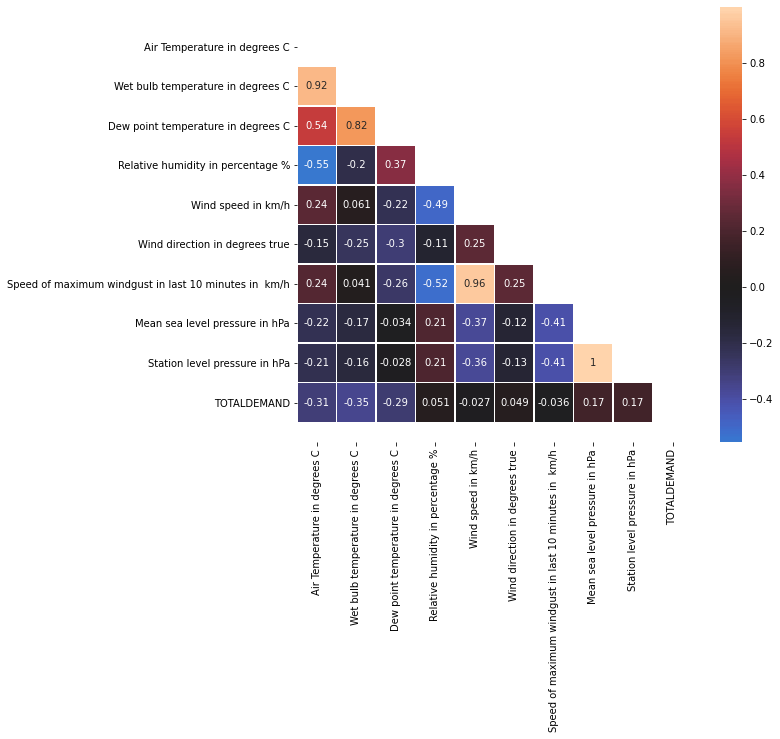

In [14]:
corrs =merged.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);


In [26]:
X1 = merged.drop(['TOTALDEMAND'],axis=1) # drop Y from our dataframe
Y1 = merged['TOTALDEMAND'] # create a dataframe with just the Y values

In [27]:


#Split into a training set with 80% of the data, and a testing set as the remainder.
X1_train, X1_test, Y1_train, Y1_test = train_test_split(
    X1, Y1, test_size=0.8,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X1_train,Y1_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X1_train)  # Get model predictions for both.
testing_predictions = linear.predict(X1_test)    # training and testing data.
# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y1_train, training_predictions),
        "test": r2_score(Y1_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y1_train, training_predictions, squared=False),
        "test": mean_squared_error(Y1_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y1_train, training_predictions),
        "test": mean_absolute_error(Y1_test, testing_predictions),
    },
})





,R^2,RMSE,MAE
train,0.140133,145.541065,118.134267
test,0.142159,145.230286,118.171358


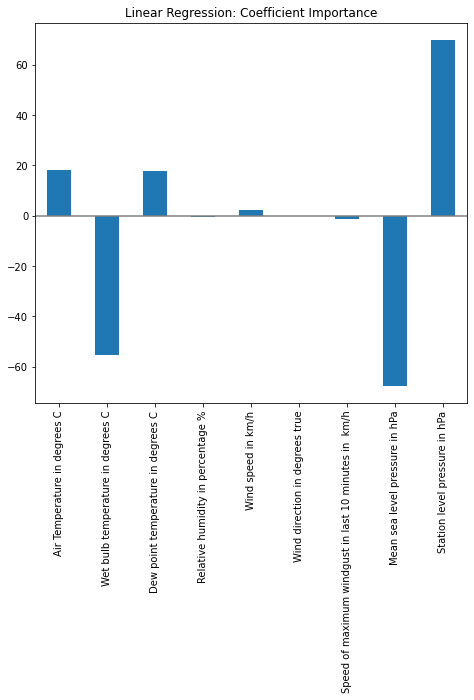

In [28]:
 # create a dataframe with the columns being the feature names and regression coefficients multiplied by the 
# standard deviation


feature_names = X1.columns.tolist() # write the column names to a list
#create a dataframe for which the columns are the feature names and regression coefficient
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)
coefficients.plot(kind='bar', figsize=(10, 7)) # plot these as a bar plot
plt.title('Linear Regression: Coefficient Importance') # add a title
plt.axhline(y=0, color='.5') # add the reference line y = 0
plt.subplots_adjust(left=.3) # move to the left a little bit

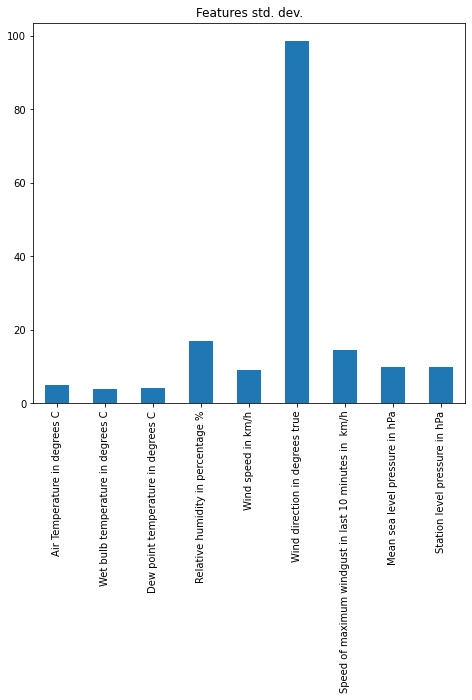

In [29]:
X1_train.std(axis=0).plot(kind='bar', figsize=(10, 7)) # plot the standard deviation of the training set features
plt.title('Features std. dev.') # add a title
plt.subplots_adjust(left=.3) # move a bit to the left

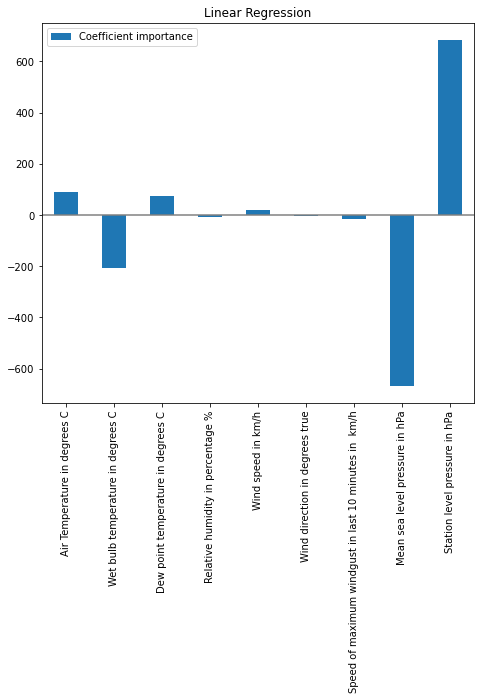

In [30]:
coefs = pd.DataFrame(
    linear.coef_* X1_train.std(axis=0),
    columns=['Coefficient importance'], index=feature_names
)
# do a similar plot of this variable, as above
coefs.plot(kind='bar', figsize=(10, 7))
plt.title('Linear Regression')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)

In [41]:
nX =(X1-X1.mean())/X1.std() # create nX, a normalised version of X
nX.describe() # show the descriptive statistics of nX

,Air Temperature in degrees C,Wet bulb temperature in degrees C,Dew point temperature in degrees C,Relative humidity in percentage %,Wind speed in km/h,Wind direction in degrees true,Speed of maximum windgust in last 10 minutes in km/h,Mean sea level pressure in hPa,Station level pressure in hPa
count,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05,1.278860e+05
mean,-7.746058e-15,-4.082288e-14,-1.689580e-14,-4.243680e-16,3.319238e-14,1.580890e-15,2.439851e-13,9.524766e-13,-1.056987e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.620421e+00,-2.818165e+00,-4.996932e+00,-3.483513e+00,-1.861933e+00,-2.492753e+00,-1.768823e+00,-3.571129e+00,-3.592873e+00
25%,-7.012591e-01,-7.248800e-01,-7.226029e-01,-7.549252e-01,-8.176794e-01,-6.745035e-01,-7.466610e-01,-6.560102e-01,-6.527894e-01
50%,-7.500629e-02,-7.242748e-02,-1.119845e-01,1.619734e-02,-2.177890e-01,3.356349e-01,-2.286735e-01,8.805859e-02,8.737160e-02
75%,6.118517e-01,6.615816e-01,6.451824e-01,7.873198e-01,6.153922e-01,8.407041e-01,5.448546e-01,7.098147e-01,7.144524e-01
max,5.722883e+00,8.110415e+00,8.168002e+00,2.032979e+00,7.814078e+00,1.143746e+00,7.057685e+00,2.697396e+00,2.698495e+00


In [42]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.

# Split into a training set with 80% of the data, and a testing set as the remainder.
X1_train, X1_test, Y1_train, Y1_test = train_test_split(
    nX, Y1, test_size=0.8,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X1_train,Y1_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X1_train)  # Get model predictions for both.
testing_predictions = linear.predict(X1_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y1_train, training_predictions),
        "test": r2_score(Y1_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y1_train, training_predictions, squared=False),
        "test": mean_squared_error(Y1_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y1_train, training_predictions),
        "test": mean_absolute_error(Y1_test, testing_predictions),
    },
})


,R^2,RMSE,MAE
train,0.140133,145.541065,118.134267
test,0.142159,145.230286,118.171358


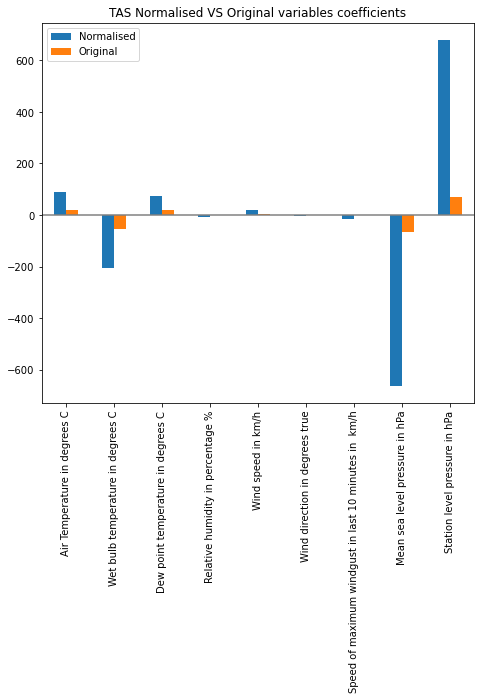

In [44]:
# create a new dataframe with the regression coefficients from the normalised data
normed_coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)

# add our original coefficient importance to this dataframe
all_coefficients = pd.DataFrame({
    'Normalised': normed_coefficients,
    'Original': coefficients,
})

# do a similar horizontal plot as before
ax = all_coefficients.plot(kind='bar',figsize=(10,7))
plt.title('TAS Normalised VS Original variables coefficients')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)

In [46]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X1_train,Y1_train)
a = linear.intercept_
b = linear.coef_
print("Best fit model: intercept", a, 'coefficient',b)

Best fit model: intercept 1155.572105283927 coefficient [  90.20393317 -203.78745619   72.43445549   -8.41549863   19.57690001
   -5.10362556  -15.9346466  -662.65600087  679.84298991]
